In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',None)

In [14]:
train=pd.read_csv("./data/train.csv")#(891,12)
test=pd.read_csv("./data/test.csv")#(418,11)
train['is_train']=1
test['is_train']=0
data=pd.concat([train,test])

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
train[train['Cabin'].notnull()]['Survived'].mean()

0.6666666666666666

In [13]:
train[train['Cabin'].isna()]['Survived'].mean()

0.29985443959243085

In [ ]:
data[data['is']]

In [8]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabins,Title,familyNum,has_family
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Z,S,0,Mr,1,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1,Mrs,1,1
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Z,S,0,Miss,0,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1,Mrs,1,1
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Z,S,0,Mr,0,0


# 特征工程

In [6]:
data['Fare']=data['Fare'].fillna(data['Fare'].median())# 有一个空值，中位数填充

data['Embarked']=data['Embarked'].fillna("S")# 就2个缺失值，填充了众数

# Cabin只有204个非空值
data['Cabins']=data['Cabin'].apply(lambda x:2 if len(str(x))>4 else(1 if pd.notna(x) else 0) )
data['Cabin']=data['Cabin'].str[:1]
data['Cabin']=data['Cabin'].fillna("Z")

# ticket比较复杂，先算了
# train['Ticket'].apply(lambda x:x.split(" ")[0]).value_counts()

data['Title']=data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt','Don','Col','Dr','Rev', 'Major', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

data['familyNum']=data['SibSp']+data['Parch']
data['has_family']=data['familyNum'].apply(lambda x:1 if x>0 else 0)

data=data.drop(['PassengerId'],axis=1)

# 数据探索

## Age列处理

<AxesSubplot:xlabel='Age', ylabel='Density'>

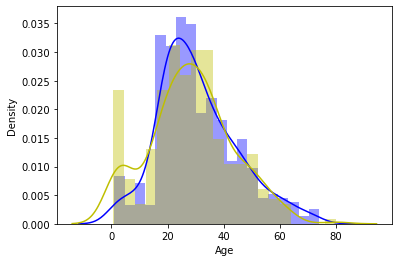

In [5]:
sns.distplot(train[train['Survived']==0]['Age'],label='Not Survived',bins=20,color='b',hist=True)
sns.distplot(train[train['Survived']==1]['Age'],label='Survived',bins=20,color='y',hist=True)

In [ ]:
def getAgeRange(x):
    if 0<=x<1

In [ ]:
train['Age_range']=train['Age'].apply(lambda x:)

## Cabin列处理
**发现**

一共891个数据，Cabin只有204个非空数据

有值的Cabin中，首字母一定是一个字母

Cabin值非空的存活率明显高于Cabin值为空的情况


**处理：**

Cabin只截取第一个字母

对Cabin为空的赋值'Z'

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
train['Cabin'].value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
D                  3
E101               3
C22 C26            3
F2                 3
F33                3
F G73              2
F4                 2
C68                2
B5                 2
C92                2
C78                2
C52                2
C93                2
B49                2
D26                2
D17                2
C124               2
E24                2
C2                 2
C125               2
C65                2
E121               2
D36                2
E67                2
B22                2
B57 B59 B63 B66    2
B18                2
E33                2
C83                2
D33                2
E8                 2
E25                2
D20                2
B28                2
B77                2
B35                2
B51 B53 B55        2
C126               2
C123               2
B58 B60            2
D35                2
E44                2
B20                2
D19                1
A5           

In [79]:
train['Cabin']=train['Cabin'].str[:1]
train['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [80]:
train[['Cabin','Survived']].groupby(['Cabin'],as_index=False).mean()

,Cabin,Survived
0,A,0.466667
1,B,0.744681
2,C,0.593220
3,D,0.757576
4,E,0.750000
5,F,0.615385
6,G,0.500000
7,T,0.000000


In [81]:
train[['Cabin','Survived']].groupby(['Cabin'],as_index=False).count()

,Cabin,Survived
0,A,15
1,B,47
2,C,59
3,D,33
4,E,32
5,F,13
6,G,4
7,T,1


In [82]:
train[train['Cabin'].isnull()]['Survived'].mean()

0.29985443959243085

## Ticket列处理

In [84]:
train['Ticket'].value_counts()# 感觉可以根据空格分割看看

CA. 2343              7
347082                7
1601                  7
3101295               6
347088                6
CA 2144               6
382652                5
S.O.C. 14879          5
W./C. 6608            4
17421                 4
PC 17757              4
347077                4
4133                  4
349909                4
LINE                  4
113781                4
19950                 4
2666                  4
113760                4
PC 17572              3
F.C.C. 13529          3
347742                3
363291                3
371110                3
110152                3
248727                3
110413                3
PC 17582              3
345773                3
239853                3
PC 17755              3
230080                3
24160                 3
SC/Paris 2123         3
13502                 3
C.A. 34651            3
35273                 3
PC 17760              3
29106                 3
C.A. 31921            3
PC 17604              2
367226          

In [87]:
train['temp']=train['Ticket'].apply(lambda x:x.split(" ")[0])

In [88]:
train['temp'].value_counts()

PC            60
C.A.          27
STON/O        12
A/5           10
W./C.          9
CA.            8
SOTON/O.Q.     8
347082         7
1601           7
A/5.           7
SOTON/OQ       7
347088         6
STON/O2.       6
3101295        6
CA             6
SC/PARIS       5
S.O.C.         5
382652         5
C              5
F.C.C.         5
349909         4
LINE           4
19950          4
4133           4
113760         4
17421          4
347077         4
2666           4
113781         4
SC/Paris       4
PP             3
24160          3
13502          3
35273          3
248727         3
239853         3
347742         3
A/4            3
363291         3
A/4.           3
110413         3
110152         3
SC/AH          3
29106          3
371110         3
S.O./P.P.      3
230080         3
345773         3
113776         2
19943          2
2653           2
35281          2
2668           2
347080         2
231919         2
250655         2
110465         2
A.5.           2
S.C./PARIS    

In [90]:
太复杂了先不处理了

,temp,Survived
0,110152,1.000000
219,27267,1.000000
185,2650,1.000000
186,2651,1.000000
187,2653,1.000000
189,2661,1.000000
191,2663,1.000000
194,2666,1.000000
195,2667,1.000000
196,2668,1.000000


## Name列处理

In [3]:
train['Title']=train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
# train['Title'] = train['Title'].replace('Mlle', 'Miss')
# train['Title'] = train['Title'].replace('Ms', 'Miss')
# train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [5]:
train[["Title", "Survived"]].groupby(['Title'], as_index=False).agg({"Survived":'mean'}).sort_values(by='Survived', ascending=False)

,Title,Survived
16,Sir,1.000000
2,Countess,1.000000
14,Ms,1.000000
11,Mme,1.000000
6,Lady,1.000000
10,Mlle,1.000000
13,Mrs,0.792000
9,Miss,0.697802
8,Master,0.575000
1,Col,0.500000


In [6]:
test['Title']=test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [7]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [4]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
# Mlle          2
Major         2
Lady          1
Jonkheer      1
Sir           1
# Ms            1
# Mme           1
Countess      1
Don           1
Capt          1

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Lady          1
Jonkheer      1
Sir           1
Ms            1
Mme           1
Countess      1
Don           1
Capt          1
Name: Title, dtype: int64

In [4]:
train['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [5]:
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


# 观察预测错的数据特点

In [59]:
best_model=None
folds=5
best_score=0
avg_score_gbt_s=0
result_gbt_s=np.zeros(418)

kf=KFold(n_splits=folds,shuffle=True,random_state=2022)
for i, (train_index,test_index) in enumerate(kf.split(train_stacking)):
    lgb=GradientBoostingClassifier(learning_rate=0.06,n_estimators=73)
    lgb.fit(train_stacking[train_index],y_train_stacking[train_index])
    score=lgb.score(train_stacking[test_index],y_train_stacking[test_index])
    print(i,'th fold：',score)
    if best_score<score:
        best_score=score
        best_model=lgb    
    avg_score_gbt_s+=score
    result_gbt_s+=lgb.predict(test_stacking)
    
avg_score_gbt_s/=folds
result_gbt_s/=folds

print("avg score= ",avg_score_gbt_s)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [31]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


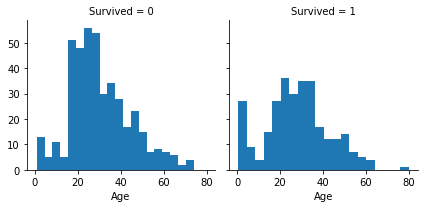

In [38]:
g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Age',bins=40)

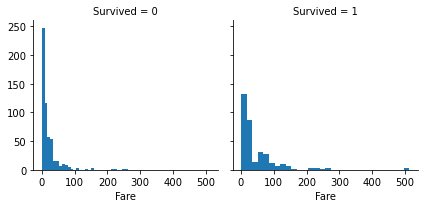

In [37]:
g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Fare',bins=30)

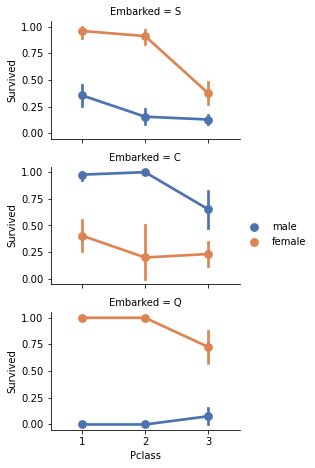

In [39]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

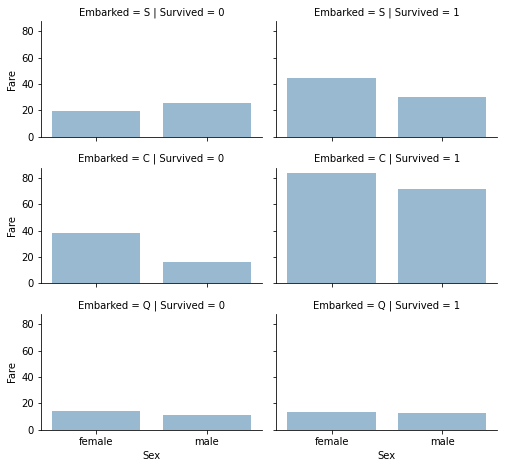

In [40]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [48]:
for dataset in data:
    dataset['Sex']=dataset['Sex'].map({'female':1,'male':0}).astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [52]:
train['AgeBand'] = pd.cut(train['Age'], 10)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 8.378]",0.666667
1,"(8.378, 16.336]",0.413043
2,"(16.336, 24.294]",0.355932
3,"(24.294, 32.252]",0.384615
4,"(32.252, 40.21]",0.440678
5,"(40.21, 48.168]",0.342857
6,"(48.168, 56.126]",0.466667
7,"(56.126, 64.084]",0.375000
8,"(64.084, 72.042]",0.000000
9,"(72.042, 80.0]",0.500000
